---
<h1><center> FYSB21 - Mathematical Methods for Vibrations, Waves and Diffusion </center></h1>
<h2><center> Heat Diffusion Lab </center></h2>
<h3><center> <em>David Hobbs, Bibiana Prinoth</em> </center></h3>
<center><img src="twoDimensionalHeatGeneral.gif" width="400"></center>

Video Credits: David Hobbs

---

---
<h1><center> Contents </center></h1>

- General information
- Introduction to tasks
- Example: Animation

<center><img src="heat_equation_solution1D.gif" width="400"></center>

--- 

---
<h1><center> General Information </center></h1>

You can find the teaching material on canvas!

You will find there:
- The lab manual
- These slides with the example for animations

If you have questions, please reach out to me via email:

bibi@astro.lu.se

---


---
<h1><center> Introduction to tasks </center></h1>

You will have to work on three tasks:

- Solution of the heat equation in one dimension
- Solution of the heat equation in two dimensions in the general case
- Solution of the heat equation using a more realistic example: Impact on Earth

---

---

## Heat equation in one dimension

<center><img src="heat_equation_solution1D.gif" width="500"></center>


---

---

## Heat equation in two dimensions

<center><img src="oneDimensionalHeatGeneral.gif" width="500"></center>

---

---

## An impact on Earth

<img src="heat_equation_solution2DEarth.gif" width="500">

---

---
# Example: How to create an animation?

There are many different ways of creating animations. Some of you (probably most) have never done that before. So we will show you two examples here:

1. Wave
2. A moving planet
---

---
## A simple wave

<center><img src="sinwave.gif" width="500"></center>

---

---

# Let's see how these animations were created

---

In [1]:
import numpy as np
import math 
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.style.use('dark_background')

In [2]:
def wave_maker(A, B, t, x, omega, k):
    x,t =np.meshgrid(x, t)
    return A*np.sin(k*x + omega*t) + B*np.cos(k*x + omega*t)

def plot_wave(xvals, wave, t, i):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Wave at t = {t[i]:.0f} seconds")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1.1,1.1)

    # This is to plot u_k (u at time-step k)
    plt.plot(xvals, wave[i], color='yellow')
    
    return plt

def animate(i):
    plt = plot_wave(xrange, wave, times, i);


done


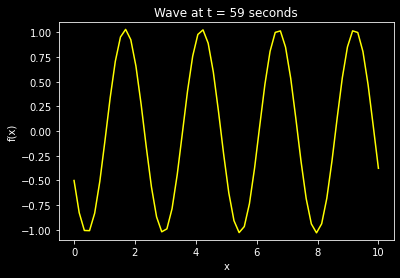

In [3]:
max_iterations = 60
#frame_scaling = 4
times = np.arange(0, max_iterations, 1)
xrange = np.linspace(0,10, max_iterations)

omega = np.pi
k = 2.5
wave = wave_maker(A=0.9, B=0.5, t=times, x=xrange, omega=omega, k=k)


anim = animation.FuncAnimation(plt.figure(), animate, interval=1, 
                               frames=max_iterations, repeat=False)

anim.save("sinwave.gif", fps=10, writer='pillow')


print('done')

---
<img src="sinwave.gif" width="1000">

---

---

# And for the planet orbit?

---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from tqdm import tqdm
#import sys
!{sys.executable} -m pip install opencv-python

# some parameters
plt.style.use('dark_background')

# some planetary params, not important
wasp_alpha= 25.1/2.

star_position = [0, 0]
orbit_position = [0, 0]
planet_pos = [0,0]

spacing = 0.01
angle = np.arange(0 , 2 * np.pi , spacing) 



ModuleNotFoundError: No module named 'tqdm'

In [ ]:
def create_frames(angles, star_radius = 2.36, planet_radius = 10):
    orbit_radius = star_radius / np.sin(np.radians(wasp_alpha))
    orbit_x = orbit_radius * np.cos(angle) 
    orbit_y = orbit_radius * np.sin(angle) 
    
    n=0
    for alpha in tqdm(angles):
        fig, ax = plt.subplots(figsize=(12,12))

        # host star
        c=plt.Circle((star_position[0], star_position[1]), radius=star_radius,
                    color='dodgerblue', ec='None', alpha=0.7, zorder=-1.5)
        ax.add_artist(c)

        # orbit line
        ax.plot(orbit_x, orbit_y, linestyle='dotted', color='white', zorder=0)
        
        # planet on orbit
        
        x_planet = star_position[0] + orbit_radius*np.sin(np.radians(np.abs(alpha)))
        y_planet = star_position[1] - orbit_radius*np.cos(np.radians(np.abs(alpha)))
        
        ax.scatter(x=x_planet, y=y_planet, c='darkorange', alpha=1, s=planet_radius*100,
                   edgecolors='darkorange', linewidths=1, zorder=2)

        in_angles = np.linspace(np.radians(alpha) , 0 , 150)+3*np.pi/2
        x_angles = 1.5*np.cos(in_angles) 
        y_angles = 1.5*np.sin(in_angles) 

        ax.plot([x_planet, star_position[0], 0], [y_planet, star_position[1], 
                                                  -orbit_radius], color='white', zorder=-1)
        
        ax.plot(x_angles, y_angles, color='white', zorder=-1)
        ax.text(s=r'$\alpha=%0.2f^\circ$' %alpha, x=11.5, y=-1, size=20)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        ax.set_aspect('equal')
        ax.set_ylim((-orbit_radius-1,orbit_radius+1))
        ax.set_xlim((-orbit_radius-3,orbit_radius+3))

        plt.savefig('frames_planet/%03d.png' %n, dpi=300)
        plt.close()
        n+=1
        
    return 0

In [ ]:
def animate_frames(folder, save_name, fps):
        
    import cv2
    import glob 
    
    img_array = []
    Files = glob.glob(folder+'/*.png')
    Files.sort()
    for filename in tqdm(Files):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(save_name+'.mp4',
                          cv2.VideoWriter_fourcc(*'MP4V'), fps, size)
    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()
    
    return 0
    
angles = np.linspace(0, 360, 100)
#create_frames(angles)
animate_frames('frames_planet', 'orbit', 30)

print('done')

---
<img src="orbit.mp4" width="700">

---